TP 1 : Régression linéaire / polynomiale
======

# 0 - Introduction

L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Nous les appliquerons à la régression linéaire et logistique.

Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [2]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import outils mathématique
import numpy as np
from numpy.linalg import inv

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.linear_model

# Divers 
from IPython.display import display, Markdown

/usr/local/tp_python/lib/python3.10/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)


# 1 - Outils de base  <a id="title1"></a>
## 1.1 - Introduction aux  notebook Jupyter <a id="title1.1"></a>

Le code est à écrire en `python 3` à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée* (ou *Shift-Entrée*), à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du "run" permettant de retrouver, par la suite, l'ordre de lancement de chaque bloc.

Commencez par importer les librairies nécessaires au TP, en exécutant le premier bloc du TP. Lancez ensuite le bloc ci-dessous. Vous devez obtenir les numéros de version des librairies installé sur votre machine.

In [3]:
print('Version de numpy:',np.__version__)
print('Version de matplotlib:',matplotlib.__version__)

Version de numpy: 1.23.5
Version de matplotlib: 3.7.1


Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [7]:
a = 1 
print(a)

1


Lancez la ligne suivante plusieurs fois. L'ordre d'exécution des blocs est important dans un notebook jupyter. Constatez les changements d'affichage produit.

In [8]:
a += 1 
print(a)

2


Relancez le premier bloc définissant la variable `a=1` puis lancez le bloc suivant (remarquez bien les valeurs après `In [` ):

In [9]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec la touche `tab`. Testez avec la fonction `np.random.randn`.

In [10]:
#autocompletion with 'tab'
#np.random.randn?
r = np.random.randint(0, 10)
print(r)

0


Vous pouvez accéder à une documentation simplifiée de la fonction avec `Shit+tab`. Pour plus d'information, cliquez sur le +. Il est possible d'accéder directement à la documentation détaillée en ajoutant `?` à la fin de la commande.
Testez avec la fonction `np.random.randn`.

In [11]:
np.random.randn

<function RandomState.randn>

In [12]:
np.random.randn?

Pour aller plus loin: https://jupyter-notebook.readthedocs.io/en/stable/

## 1.2 - Introduction à la visualisation des données (Matplotlib)<a id="title1.2"></a>

Nous allons utiliser dans ce TP la librairie de visualisation `Matplotlib`. L'usage de cette librairie est simplifié dans les notebook jupyter. Je donnerai dans ce TP l'usage standard de la librairie, certaines instructions données pourront être facultatives dans un notebook mais serait indispensable dans un interpréteur python classique.

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visible. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

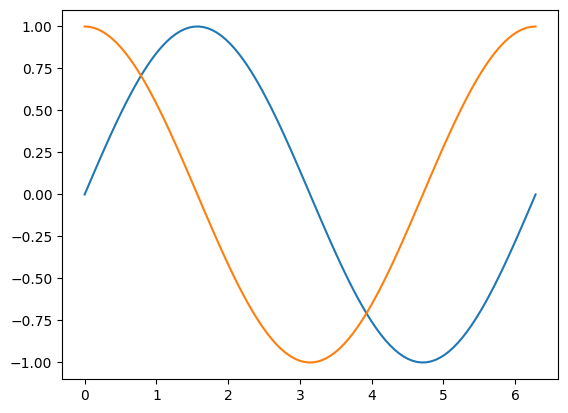

In [13]:
x = np.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,np.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,np.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seuls les points calculés sont tracés à l'aide d'étoile.

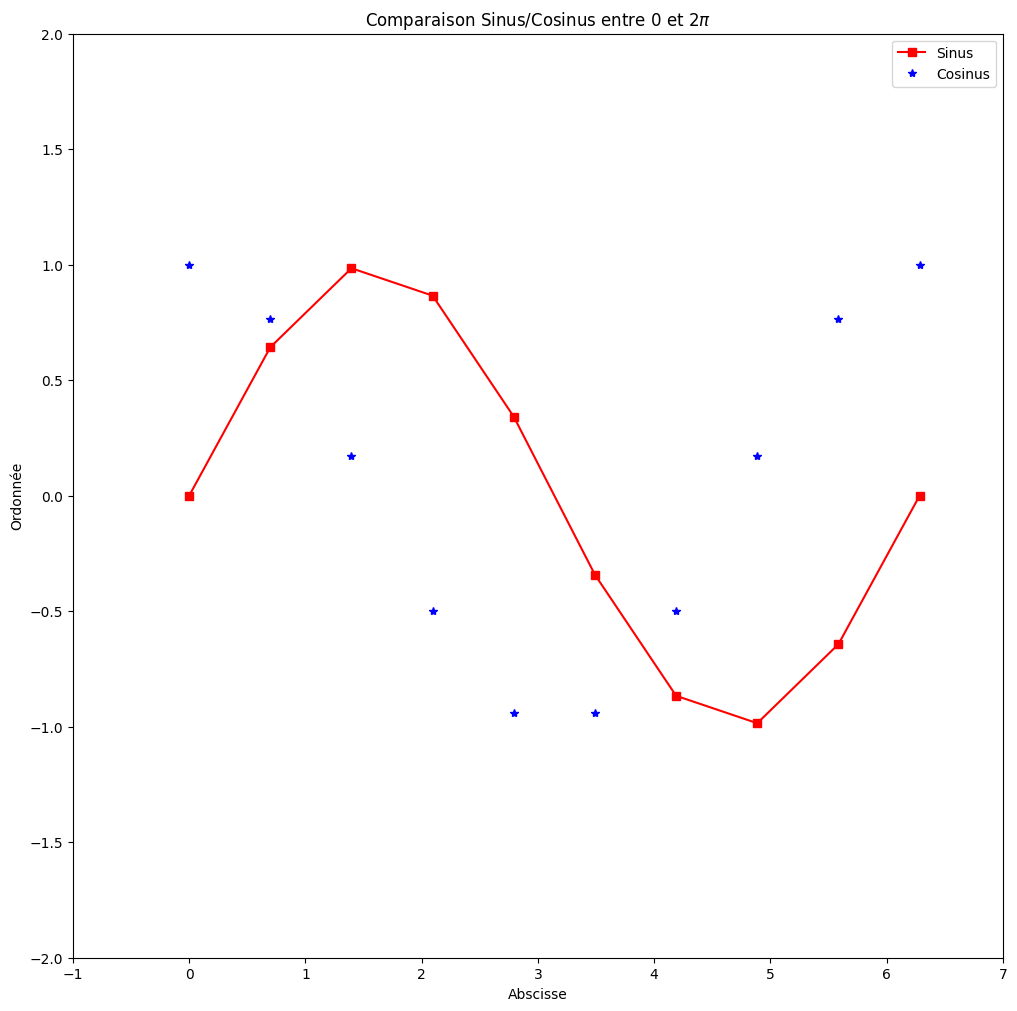

In [14]:
x = np.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,np.sin(x),'rs-',label='Sinus')
plt.plot(x,np.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les relier:

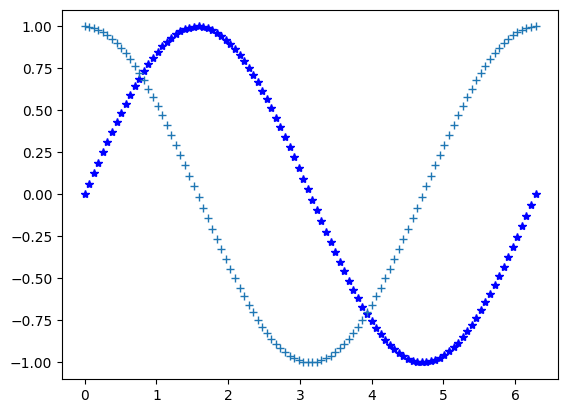

In [15]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'b*')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $\dfrac{x}{\pi}$ (vous pouvez utiliser `np.sinc`) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

/tmp/ipykernel_56492/2304529071.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, 1/x, 'r--', label="1/x", color="orange")


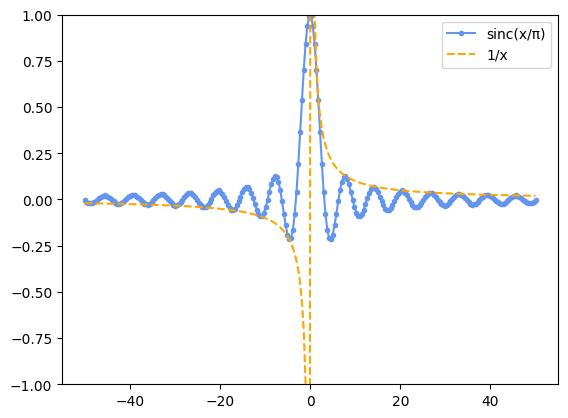

In [16]:
#Définir range x
x = np.linspace(-50,50, 250)
plt.figure()

plt.plot(x, np.sinc(x/np.pi), '.-', label="sinc(x/π)", color="cornflowerblue")
plt.plot(x, 1/x, 'r--', label="1/x", color="orange")

#Définir range y
plt.ylim([-1, 1])

#Légendes
plt.legend()

#Afficher
plt.show()

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

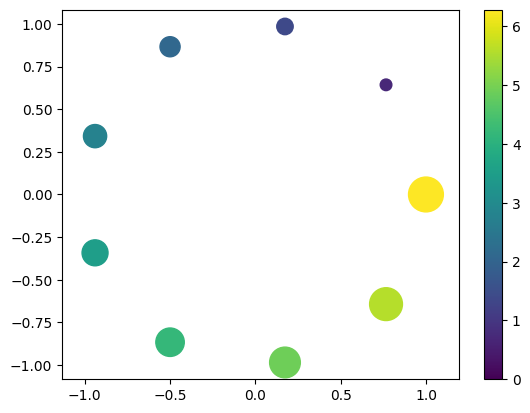

In [17]:
t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

#cbar = plt.colorbar(ticks=[0,np.pi,2*np.pi])
#cbar.ax.set_yticklabels(["Low","Medium","High"])

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

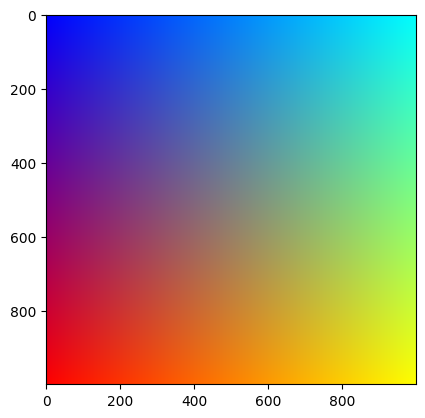

In [18]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

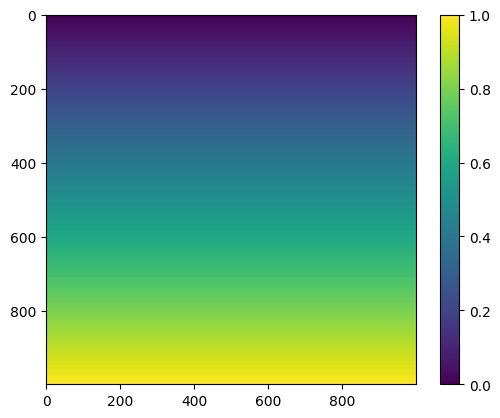

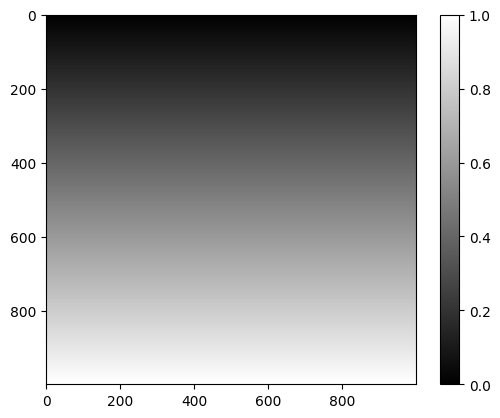

In [19]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

Il est possible d'afficher des points en 3D. Pour cela il faut définir une figure avec une projection 3D. Il est ensuite possible d'utiliser les fonctions précédemment vues comme `plt.scatter`.

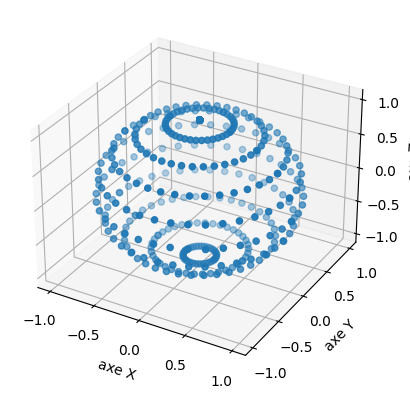

In [20]:
t = np.linspace(0,2*np.pi,20)
t = np.stack(np.meshgrid(t,t),axis=2).reshape((-1,2))

ax = plt.figure().add_subplot(projection='3d') # définition d'une figure 3D

ax.scatter(np.cos(t[:,1])*np.sin(t[:,0]), # abscisse
           np.sin(t[:,1])*np.sin(t[:,0]), # ordonnée
           np.cos(t[:,0]) # profondeur
          )
ax.set_xlabel('axe X')
ax.set_ylabel('axe Y')
ax.set_zlabel('axe Z')
plt.show()

Il est possible de faire des figures avec des sous-figures en utilisant `plt.subplots`.

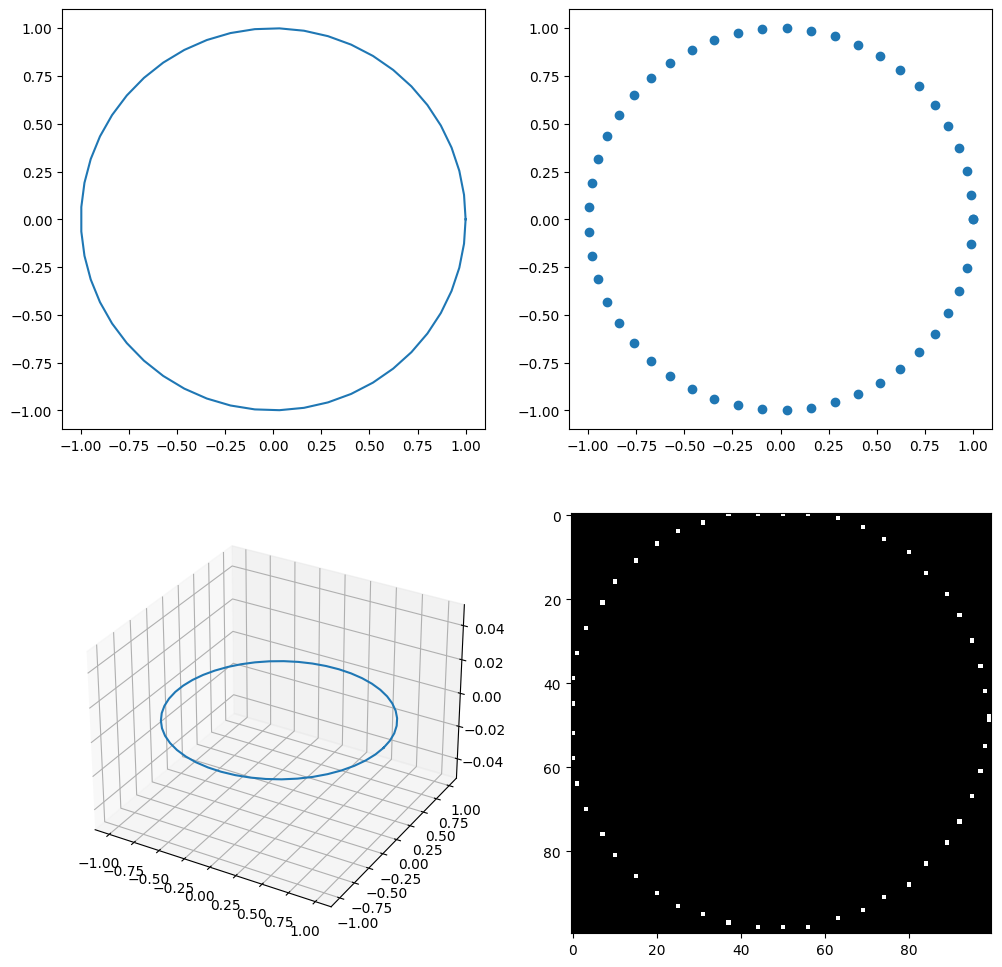

In [21]:
x = np.linspace(0,2*np.pi,int(5e1))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 2)
ax.scatter(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot(np.cos(x),np.sin(x))
ax = fig.add_subplot(2, 2, 4)
im = np.zeros((100,100))
im[(49+np.cos(x)*50).astype('int'),(49+np.sin(x)*50).astype('int')]=1
ax.imshow(im.T,cmap='gray')
plt.show()

## 1.3 Le calcul matriciel

Cette partie a pour but de reprendre rapidement les bases de numpy et notamment les éléments du tutoriel https://numpy.org/doc/stable/user/quickstart.html . N'hésitez pas à lire ce tutoriel pour avoir une maitrise des notions abordées.

### 1.3.1 Les créations de tableaux numpy

`Numpy` offre plusieurs outils de création de tableau que vous pouvez retrouver à l'adresse suivante: https://numpy.org/doc/stable/reference/routines.array-creation.html . Étudiez plus particulièrement les fonctions : 
- [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones),
- [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros), 
- [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array), 
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), 
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange).

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant 5 fois la valeur un que vous nommerez `v1`.  

In [22]:
v1 = np.ones(5)
print("v1 = "+str(v1))

v1 = [1. 1. 1. 1. 1.]


En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant les valeurs 9,10,11 que vous nommerez `v2`.  

In [23]:
v2 = np.linspace(9,11,3)
print("v2 = "+str(v2))
print("v2[0] = "+str(v2[0]))
print("v2[1] = "+str(v2[1]))
print("v2[2] = "+str(v2[2]))

v2 = [ 9. 10. 11.]
v2[0] = 9.0
v2[1] = 10.0
v2[2] = 11.0


En utilisant la fonction appropriée de `numpy`, créez une matrice contenant les valeurs 1,2,3 sur la première ligne et 4,5,6 sur la seconde. Vous la nommerez `M1`.  

In [24]:
deb = 1
fin = 6

nbLignes = 2
elementParLignes = 3

#Créer un tableau qui va de deb à fin+1 et changer le tableau en matrice avec nbLignes lignes et tant d'elementParLignes.
M1 = np.array(np.array(np.arange(deb, fin+1).reshape(nbLignes, elementParLignes)))
print("M1 = "+str(M1))

M1 = [[1 2 3]
 [4 5 6]]


Écrivez une matrice `M2` de taille $10\times10$ contenant que des zéros. Vous vérifierez les dimensions de la matrice avec l'attribut `shape`.

In [25]:
lenX = 10
lenY = 10

#Generer lenX * lenY 0 et changer la forme du tableau en matrice
M2 = np.zeros(lenX * lenY).reshape(lenX, lenY)
print("M2 = "+str(M2)+"\n")

#Afficher .shape
print("M2.shape = "+str(M2.shape))

M2 = [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

M2.shape = (10, 10)


Il est possible de générer des tableaux pseudo-aléatoires avec `numpy`: https://numpy.org/doc/stable/reference/random/legacy.html

En vous appuyant sur la documentation générez une matrice `M3` de taille 10 par 5 de valeurs aléatoires entre 0 et 1 selon une loi uniforme. 

In [39]:
y = 10
x = 5

M3 = np.array(np.random.uniform(0, 1, y * x))
M3 = M3.reshape(y, x)
print(M3)
print("Les valeurs changent à chaque réexécution du bloc")

[[0.73246155 0.11652343 0.46369972 0.20180391 0.09269028]
 [0.9965436  0.00986582 0.51519635 0.7860801  0.63526787]
 [0.79139226 0.09500532 0.40504307 0.8059248  0.07808164]
 [0.496351   0.25015435 0.60129726 0.64382277 0.97315803]
 [0.40030134 0.79701826 0.30251338 0.6133182  0.20135913]
 [0.5966076  0.84907709 0.61247721 0.48394255 0.26838919]
 [0.52180512 0.59889557 0.80852817 0.72815705 0.59047854]
 [0.60908578 0.49548596 0.11778304 0.51729025 0.35253034]
 [0.05839781 0.31244778 0.30689015 0.17426418 0.69980296]
 [0.71810452 0.10944657 0.93980524 0.54513186 0.31042935]]
Les valeurs changent à chaque réexécution du bloc


### 1.3.2 Les opérateurs mathématiques de base

Il est possible de faire des opérations termes à termes entre deux tableaux numpy par exemple avec `+ - / *`.

Testez les codes suivants:

In [38]:
print(2*v2)
print()
print(M1+M1)
print()
print(M3*M3)

[18. 20. 22.]

[[ 2  4  6]
 [ 8 10 12]]

[[1.35312235e-02 1.56287771e-01 3.36955006e-02 7.33067370e-02
  8.05847887e-01]
 [4.42452241e-01 9.35718690e-01 7.79859786e-01 5.41443197e-02
  4.75816554e-01]
 [3.11225681e-01 3.92097366e-01 4.71116249e-01 2.66328317e-04
  9.56720229e-02]
 [9.76468523e-01 8.09911974e-01 2.71523954e-01 2.69534389e-01
  3.76891621e-02]
 [1.88138181e-01 6.86077000e-01 6.05197065e-01 7.65851914e-04
  2.89303859e-02]
 [7.25984040e-01 1.75674526e-01 5.21075947e-01 9.90932012e-02
  5.37905985e-01]
 [8.43399525e-01 1.84350540e-01 8.50062045e-01 2.54331508e-02
  3.20778409e-02]
 [7.66410907e-01 4.90297480e-02 1.44312058e-01 1.73624626e-01
  8.23934662e-01]
 [4.24888499e-01 1.29147133e-01 1.81047059e-01 9.47641580e-05
  9.90198708e-03]
 [2.90783333e-02 1.28636861e-03 5.75953467e-01 9.62328938e-01
  2.46241022e-01]]


Le produit matriciel se fait avec l'opérateur `dot` ou le symbole `@`. En vous référant à la documentation ( https://numpy.org/doc/stable/reference/generated/numpy.dot.html ), calculez le produit matriciel entre la matrice `M3` et le vecteur `v1`. 

In [28]:
AROBASE_produitMatriciel = np.array(M3@v1)
print(AROBASE_produitMatriciel)

DOT_produitMatriciel = np.dot(M3, v1)
print(DOT_produitMatriciel)

[1.86366209 3.43807697 2.19606043 3.1224989  2.23775414 3.04124979
 2.60829719 2.80115121 1.54594485 2.44251611]
[1.86366209 3.43807697 2.19606043 3.1224989  2.23775414 3.04124979
 2.60829719 2.80115121 1.54594485 2.44251611]


En vous référant à la documentation sur les opérateurs de manipulation de tableau ( https://numpy.org/doc/stable/reference/routines.array-manipulation.html ), que fait selon vous l'opération suivante:

`M1.T`


In [29]:
print(M1)
#print(T)
print(M1.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


Quelle autre solution la documentation propose-t-elle pour réaliser cette opération ?

In [30]:
print("Vérification des valeurs de sorties des deux solutions: ")
autreManiere = np.transpose(M1)

print(autreManiere)

print(M1.T==autreManiere)

Vérification des valeurs de sorties des deux solutions: 
[[1 4]
 [2 5]
 [3 6]]
[[ True  True]
 [ True  True]
 [ True  True]]


L'opérateur `inv` ( https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html ) permet l'inversion d'une matrice.
Expliquez ce que fait l'opération suivante:

`inv( M1 @ M1.T)`

In [31]:
print((M1@M1.T))
print(inv(M1@M1.T))

[[14 32]
 [32 77]]
[[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]


### 1.3.3 Les opérateurs de concaténation

`Numpy` offre plusieurs opérateurs de concaténation: https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays . 
Veuillez lire plus particulièrement les documentations des fonctions suivantes:

- [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate)
- [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack)
- [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html#numpy.append)


En utilisant la fonction la plus appropriée, concaténez les matrices `M2` et `M3` selon l'axe des colonnes.

In [32]:
print("Dim M2 = "+str(M2.shape))
print("Dim M3 = "+str(M3.shape))
print(np.concatenate((M2, M3), axis=1).shape)

Dim M2 = (10, 10)
Dim M3 = (10, 5)
(10, 15)


Est-il possible de concaténer `M2` et `M3` selon l'axe des lignes ? Si oui comment, si non pourquoi ?   

En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première ligne le vecteur `v2` et sur la deuxième ligne un vecteur de 1.

In [33]:
print(v2)
print(v1)
a = np.array(v2)
b = np.array(v1)
print(np.stack((a, b[2:])))

[ 9. 10. 11.]
[1. 1. 1. 1. 1.]
[[ 9. 10. 11.]
 [ 1.  1.  1.]]


En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première colonne le vecteur `v2` et sur la deuxième colonne un vecteur de 1.

In [37]:
print(np.column_stack((v2, v1[2:])))

[[ 9.  1.]
 [10.  1.]
 [11.  1.]]


En utilisant la fonction la plus appropriée, créez un vecteur contenant d'abord 3 cases à 1 puis les valeurs du vecteur `v2`.

In [36]:
temp = np.append((np.ones(3)), v2)
print(temp)

[ 1.  1.  1.  9. 10. 11.]


### 1.3.4 Le broadcasting

Lisez attendivement les informations de la page https://numpy.org/doc/stable/user/basics.broadcasting.html . Ce mécanisme est très puissant et peut simplifier/optimiser grandement votre code.

- Créez un vecteur `x` de 100 valeurs entre $-2\pi$ et $2\pi$.
- Créez un vecteur $v_\text{cos}$ de 100 valeurs de cosinus entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- Créez un vecteur $v_\text{sin}$ de 100 valeurs de sinus  entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- En utilisez le broadcasting de numpy, créé une matrice $M$ dont les valeurs $M_{i,j}$ sont $\text{cos}(x_i) + \text{sin}(x_j)$ où $x_i$ est la $i^\text{ème}$ valeur de $v_\text{cos}$ et $x_j$ est la $j^\text{ème}$ valeur de $v_\text{sin}$.
- A l'aide de la fonction `plt.imshow` de `matplotlib` . Affichez cette matrice comme une image.

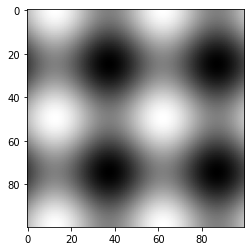

In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,100)
vcos = np.cos(x)
vsin = np.sin(x)
plt.imshow(vcos[:, np.newaxis] + vsin[np.newaxis, :], cmap=plt.cm.gray)

Bonus: En considérant une image noir et blanc comme une surface 3D dont l'altitude correspond à l'intensité lumineuse, affichez la figure précédente en 3D.

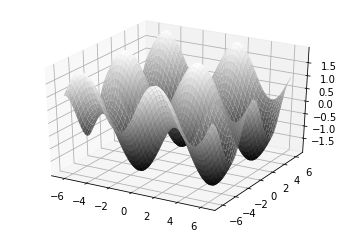

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, x)
Z = vcos[:, np.newaxis] + vsin[np.newaxis, :]

ax.plot_surface(X, Y, Z, cmap=plt.cm.gray)

plt.show()


# 2 - Régression linéaire

## 2.1 - Génération d'un problème de régression

La bibliothèque `scikit-learn` permet de générer un problème de régression et de le résoudre.
Vous pouvez par exemple générer un problème de régression linéaire à l'aide de la fonction `make_regression` ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

Générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur,
- une dimension informative,
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Affichez les points obtenus. Pour simplifier la suite vous stockerez les abscisses dans un vecteur `x` et les ordonnées dans un vecteur `y`. Vérifiez vos dimensions pour n'avoir qu'une dimension dans les deux cas.

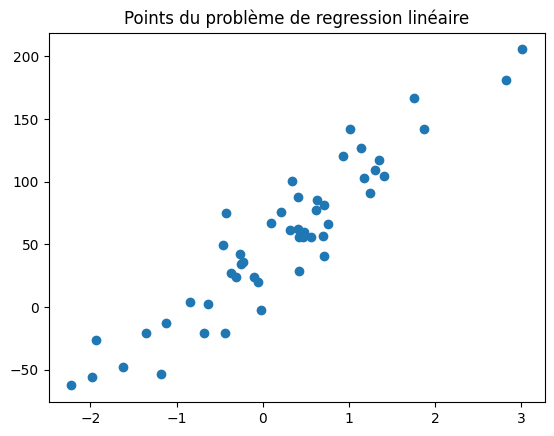

In [4]:
# Génération des données
descripteur, y, coefs = sklearn.datasets.make_regression(n_samples=50, n_features=2, noise=5, bias=50, coef=True)
x = descripteur[:,1].reshape(-1,1)


# Affichage
plt.scatter(x, y)
plt.title("Points du problème de regression linéaire")
plt.show()


## 2.2 - Résolution analytique

En vous basant sur votre cours, qu'elle est la formule analytique permettant de résoudre ce problème de régression ? 

In [5]:
# Remplacez les ? par votre réponse
formule = '$$w_0 = \overline{y} - w_1 \overline{x} $$\
           $$w_1 = cov(x,y)/var(x)$$\
           $$y = w_0 + w_1 x$$'
display(Markdown(formule))

$$w_0 = \overline{y} - w_1 \overline{x} $$           $$w_1 = cov(x,y)/var(x)$$           $$y = w_0 + w_1 x$$

En utilisant la question précédente et les fonctions statistique de `numpy` ( https://numpy.org/doc/stable/reference/routines.statistics.html
https://numpy.org/doc/stable/reference/routines.statistics.html ), donnez l'équation de la meilleure droite résolvant ce problème de régression.

cov(x, y) = 63.569323365253226
x_bar =  0.21465779063152277
y_bar = 54.788773432986005
w_1 = 53.189295039175605
w_0 = 43.37127687462836


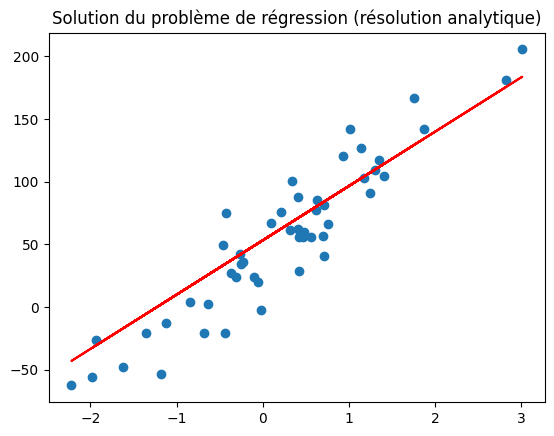

--------------
 Y = 53.2x+43.4
--------------


In [6]:
def signed_string(n):
    return "{:+}".format(n) if n >= 0 else "{}".format(n)

cov_xy = np.cov(x.T, y.T)[0,1]
print("cov(x, y) =", cov_xy)

x_bar = (sum(x)/len(x))[0]
print("x_bar = ", x_bar)

y_bar = sum(y)/len(y)
print("y_bar =", y_bar)

w_1 = (cov_xy/np.var(x, axis=0))[0]

print("w_1 =", w_1)

w_0 = y_bar - w_1*x_bar

print("w_0 =", w_0)

# Affichage
plt.scatter(x, y)
plt.plot(x, w_0*x+w_1, 'r-')
plt.title("Solution du problème de régression (résolution analytique)")
plt.show()

print("--------------")
print(" Y =",str(round(10*w_1)/10)+"x"+signed_string(round(10*w_0)/10))
print("--------------")


## 2.3 - Résolution avec scikit-learn

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`.

w0= 43.5996268057955
w1= 52.12550913839211


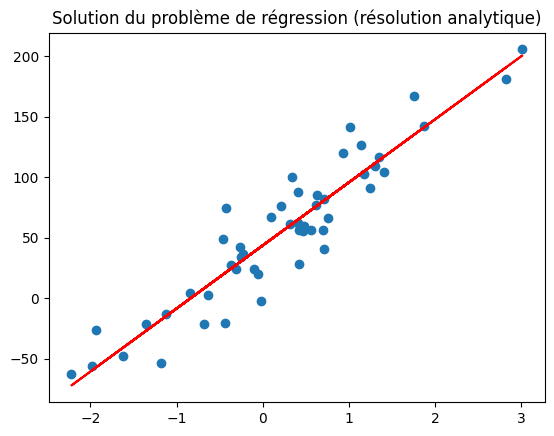

--------------
 Y = 52.12550913839211x+43.5996268057955
--------------


In [7]:
model = sklearn.linear_model.LinearRegression().fit(x, y) 

r_sq = model.score(x, y)

w0 = model.intercept_
w1 = model.coef_[0]
print('w0=', w0)

print('w1=', w1)
# Affichage
plt.scatter(x, y)
plt.plot(x, w1*x+w0, 'r-')
plt.title("Solution du problème de régression (résolution analytique)")
plt.show()

print("--------------")
print(" Y =",str(w1)+"x"+signed_string(w0))
print("--------------")


Les résultats entre les deux méthodes de résolution sont-ils comparables ? 

## 2.4 - Prédire de nouvelles valeurs

Prédisez les valeurs régressées pour 100 points dans un intervalle compris entre min(x) et max(x).  Utilisez la formule d'une droite avec les paramètres trouvés aux questions précédentes puis utilisez la fonction `predict` du régresseur `scikit-learn`.

In [8]:
minX = 0
maxX = 100

tab = np.linspace(0, 100, 100)

t = w1*tab + w0

print(t)

[  43.59962681   96.25165624  148.90368567  201.5557151   254.20774454
  306.85977397  359.5118034   412.16383283  464.81586227  517.4678917
  570.11992113  622.77195057  675.42398     728.07600943  780.72803886
  833.3800683   886.03209773  938.68412716  991.33615659 1043.98818603
 1096.64021546 1149.29224489 1201.94427433 1254.59630376 1307.24833319
 1359.90036262 1412.55239206 1465.20442149 1517.85645092 1570.50848035
 1623.16050979 1675.81253922 1728.46456865 1781.11659809 1833.76862752
 1886.42065695 1939.07268638 1991.72471582 2044.37674525 2097.02877468
 2149.68080411 2202.33283355 2254.98486298 2307.63689241 2360.28892185
 2412.94095128 2465.59298071 2518.24501014 2570.89703958 2623.54906901
 2676.20109844 2728.85312787 2781.50515731 2834.15718674 2886.80921617
 2939.46124561 2992.11327504 3044.76530447 3097.4173339  3150.06936334
 3202.72139277 3255.3734222  3308.02545163 3360.67748107 3413.3295105
 3465.98153993 3518.63356937 3571.2855988  3623.93762823 3676.58965766
 3729.24

Les résultats obtenus vous semble-t-il satisfaisant  ? 

In [9]:
tab = np.arange(0,101).reshape((101,1))
y_pred = model.predict(tab)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[  43.59962681   95.72513594  147.85064508  199.97615422  252.10166336
  304.2271725   356.35268164  408.47819077  460.60369991  512.72920905
  564.85471819  616.98022733  669.10573647  721.2312456   773.35675474
  825.48226388  877.60777302  929.73328216  981.8587913  1033.98430044
 1086.10980957 1138.23531871 1190.36082785 1242.48633699 1294.61184613
 1346.73735527 1398.8628644  1450.98837354 1503.11388268 1555.23939182
 1607.36490096 1659.4904101  1711.61591923 1763.74142837 1815.86693751
 1867.99244665 1920.11795579 1972.24346493 2024.36897406 2076.4944832
 2128.61999234 2180.74550148 2232.87101062 2284.99651976 2337.1220289
 2389.24753803 2441.37304717 2493.49855631 2545.62406545 2597.74957459
 2649.87508373 2702.00059286 2754.126102   2806.25161114 2858.37712028
 2910.50262942 2962.62813856 3014.75364769 3066.87915683 3119.00466597
 3171.13017511 3223.25568425 3275.38119339 3327.50670252 3379.63221166
 3431.7577208  3483.88322994 3536.00873908 3588.13424822 36

Est-il pertinent de chercher à effectuer une régression linéaire régularisée sur ce jeu de données (type
LASSO ou Ridge) ? Expliquez pourquoi.

## 2.5 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des paramètres (w,b) appris.

In [10]:
def eval_regresseur(x,w,b):
    return np.dot(x, w) + b

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [11]:
def get_loss(x,y,w,b):
    y_pred = eval_regresseur(x, w, b)
    loss = (1/2) * np.mean((y - y_pred)**2)
    return loss

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne deux valeurs correspondant à la dérivée de la fonction de coût par rapport à $b$ et la dérivée de la fonction de coût par rapport à $w$.

In [12]:
def get_grad_loss(x,y,w,b):
    y_pred = eval_regresseur(x, w, b)
    dw = (1/x.shape[0]) * np.dot(x.T, (y_pred - y).reshape(-1,1))
    db = (1/x.shape[0]) * np.sum((y_pred - y).reshape(-1))
    return dw, db

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $w$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [13]:
def train_regresseur(x,y,t,N_max):
    '''
    :param X: exemples d'apprentissage
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :param N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise (w,b), ainsi que l'évolution de la fonction de coût
    '''
    # Initialisation aléatoire de w et b
    w = np.random.randn(x.shape[1], 1)
    b = np.random.randn()
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad_w, grad_b = get_grad_loss(x,y,w,b)
        w = w - t*grad_w
        b = b - t*grad_b
        loss.append(get_loss(x,y,w,b))
    return w,b,np.array(loss)


Visualisez l'évolution de la fonction de coût durant l'apprentissage. Est-elle bien décroissante ? 

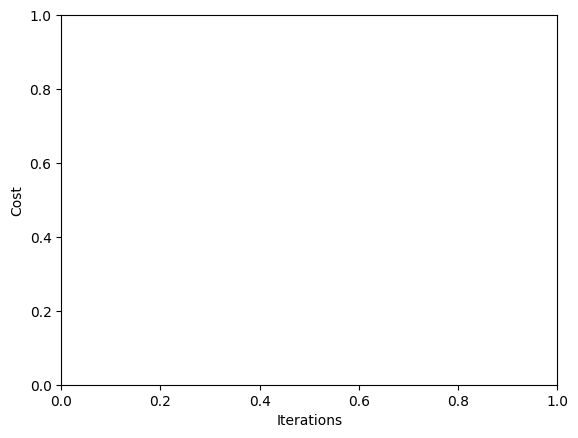

In [14]:
#w,b,loss = train_regresseur(x,y,t,10)
#plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Visualisez la droite apprise par votre régresseur. Est-elle correcte ?

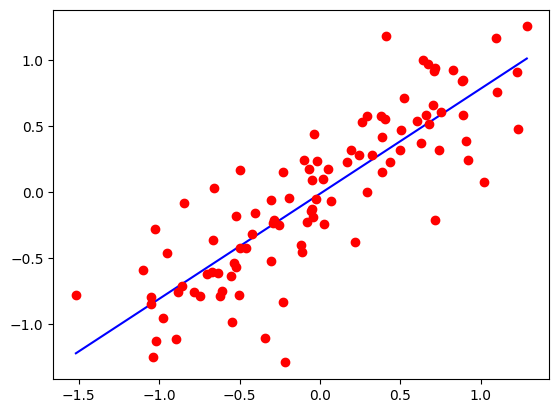

In [15]:
# Fonction de coût
def error(m, b, X, Y):
    return sum(((m * x + b) - Y[idx])**2 for idx, x in enumerate(X)) / float(len(X))

# Gradient du paramètre m
def m_grad(m, b, X, Y):
    return sum(-2 * x * (Y[idx] - (m * x + b)) for idx, x in enumerate(X)) / float(len(X))

# Gradient du paramètre b
def b_grad(m, b, X, Y):
    return sum(-2 * (Y[idx] - (m * x + b)) for idx, x in enumerate(X)) / float(len(X))

def gradient_descent_LR(X, Y, epochs, lr):
    assert(len(X) == len(Y))
    m = 0
    b = 0
    for e in range(epochs):
        m = m - lr * m_grad(m, b, X, Y)
        b = b - lr * b_grad(m, b, X, Y)
    return m, b

# Génération du jeu de données
X = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)
Y = np.linspace(-1, 1, 100) + np.random.normal(0, 0.25, 100)
# Exécution de l'algorithme
m, b = gradient_descent_LR(X, Y, epochs=10000, lr=0.001)
# Visualisation de la droite avec les valeurs de m et b trouvées par descente de gradient
line_x = [min(X), max(X)]
line_y = [(m * i) + b for i in line_x]
plt.plot(line_x, line_y, 'b')
plt.plot(X, Y, 'ro')
plt.show()

# 3 - Régression polynomiale

Exécutez le code suivant pour générer un nouveau problème de régression

In [16]:
d = data.make_regression(
    n_samples = 30,
    n_features = 1,
    n_informative = 1,
    n_targets = 2,
    noise = 10
)

x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

Affichez les données générées.

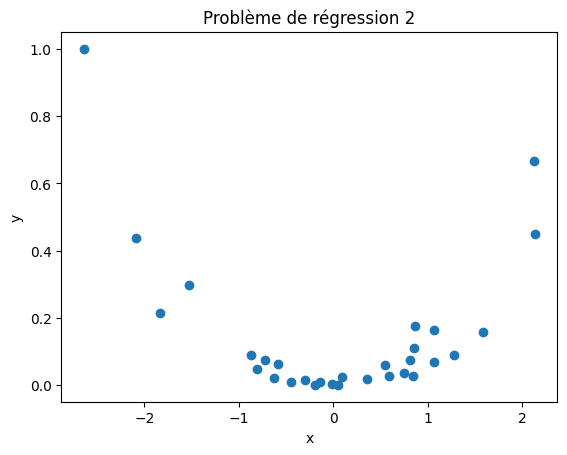

In [17]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Problème de régression 2")
plt.show()

A votre avis quel devrait être le degré d'un polynôme résolvant ce problème de régression ?

## 3.1 Résolution analytique

En utilisant l'astuce vue en cours pour effectuer une régression polynomiale, faites la résolution analytique de ce problème de régression.

x1 :  -1.8376653850295244 0.2148920023991574
x2 :  -0.6253180933222848 0.021334847111448816
x3 :  -2.6422944166860227 1.0
[0.40460773 0.83688728 0.38644479]


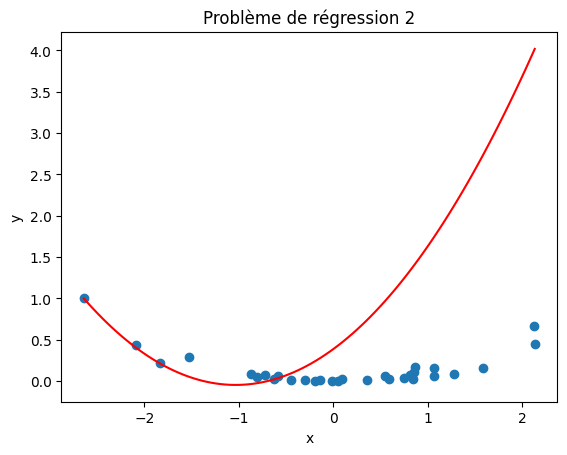

In [18]:
#On prend 3 point au hasard
nbs_alea = np.random.randint(0, len(x.ravel())-1, size=3)
x1, y1 = x[nbs_alea[0]][0], y[nbs_alea[0]][0]
x2, y2 = x[nbs_alea[1]][0], y[nbs_alea[1]][0]
x3, y3 = x[nbs_alea[2]][0], y[nbs_alea[2]][0]
print("x1 : ",x1,y1)
print("x2 : ",x2,y2)
print("x3 : ",x3,y3)

#On trouve alors une parabole qui passe par les 3 points
points = np.array([[x1, y1], [x2, y2], [x3, y3]])
coefs = np.polyfit(points[:,0], points[:,1], 2)

print(coefs)

xbis = np.linspace(min(x),max(x),100)
ybis = (np.square(xbis)*coefs[0])+coefs[1]*xbis+coefs[2]

#Affichage
plt.scatter(x, y)
plt.plot(xbis, ybis, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Problème de régression 2")
plt.show()

## 3.2 Résolution avec scikit-learn

En utilisant la même astuce, résolvez ce problème de régression polynomial avec le régresseur linéaire de scikit-learn.

[[ 0.         -0.00496938  0.12085829]]
biais =  -0.01215721508401113


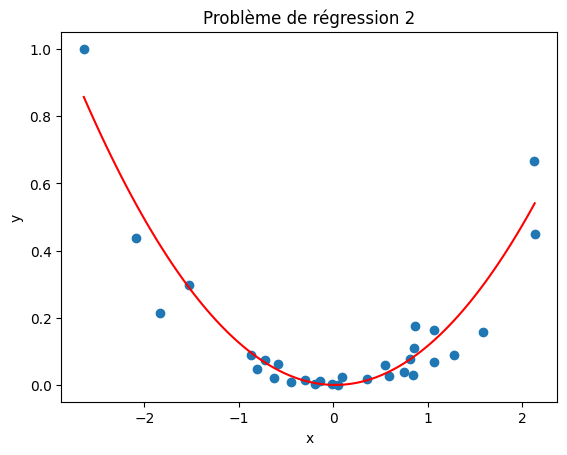

In [19]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = sklearn.linear_model.LinearRegression()

model.fit(x_poly, y)

# Afficher les coeffs
print(model.coef_)
print("biais = ",model.intercept_[0])

#Affichage
plt.scatter(x, y)
plt.plot(xbis, (model.coef_[0][2]*xbis*xbis)+model.coef_[0][1]*xbis+model.coef_[0][0], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Problème de régression 2")
plt.show()

Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation. Tracez les courbes correspondantes et étudiez les valeurs des coefficients des
polynômes trouvés. Faites une analyse des résultats.

**Plus le polynôme a un degré élevé, plus on a de minimum local. Le résultat de la fonction de coût est minimisé**

Testez également les modèles `linear_model.Ridge` et `linear_model.Lasso` à la place de linear model.LinearRegression
. Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation.

[[ 0.         -0.00255036  0.18093541]]
biais =  0.005532176752372137


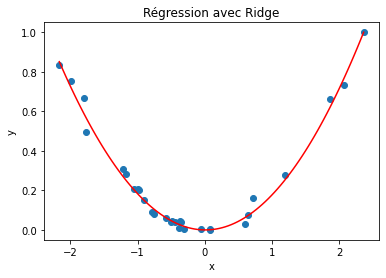

In [ ]:
model = sklearn.linear_model.Ridge(alpha = 0.1)
model.fit(x_poly, y)

# Afficher les coeffs
print(model.coef_)
print("biais = ",model.intercept_[0])

#Affichage
plt.scatter(x, y)
plt.plot(xbis, (model.coef_[0][2]*xbis*xbis)+model.coef_[0][1]*xbis+model.coef_[0][0], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Régression avec Ridge")
plt.show()

[0.         0.         0.14150015]
biais =  0.059534896400557896


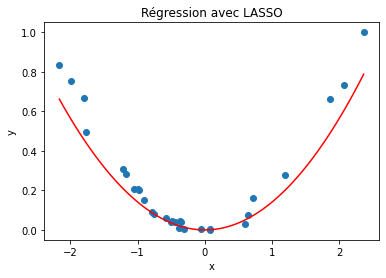

In [ ]:
model = sklearn.linear_model.Lasso(alpha = 0.1)
model.fit(x_poly, y)

# Afficher les coeffs
print(model.coef_)
print("biais = ",model.intercept_[0])

#Affichage
plt.scatter(x, y)
plt.plot(xbis, (model.coef_[2]*xbis*xbis)+model.coef_[1]*xbis+model.coef_[0], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Régression avec LASSO")
plt.show()

La documentation de scikit-learn propose une autre fonction pour la régression LASSO : linear model.LassoLars ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html ).
Quelle est la différence avec la précédente ? Testez cette fonction pour ce problème de régression.

In [ ]:
#La régression Ridge ajoute un terme de régularisation de la norme L2 des coefficients, ce qui a pour effet de réduire la valeur des coefficients pour les variables qui ont une faible importance pour la prédiction. Cela permet de limiter la complexité du modèle et de réduire la variance des prédictions.

In [ ]:
#La régression Lasso ajoute un terme de régularisation de la norme L1 des coefficients, ce qui a pour effet de réduire la valeur des coefficients pour les variables qui ont une faible importance pour la prédiction, et même de les rendre égales à zéro pour certaines variables. Cela permet de sélectionner automatiquement les variables les plus importantes pour la prédiction.

## 3.3 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des poids appris (W). On utilisera l'astuce vue en cour pour intégrer le biais à $W$.

In [4]:
def eval_regresseur(X,W):
    return np.dot(X,W)

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [ ]:
def get_loss(X,y,W):
    return np.mean((y - eval_regresseur(X,W))**2)

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne une valeur correspondant au gradient de la fonction de coût par rapport W.

In [ ]:
def get_grad_loss(X,y,W):
    return -2*np.dot(X.T, y-eval_regresseur(X,W))/X.shape[0]

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $W$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [ ]:
def train_regresseur(X,y,t,N_max):
    '''
    :param X: exemples d'apprentissage (la première colonne doit contenir que des 1).
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :param N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise
    '''
    y = y[:,None]
    # Initialisation aléatoire de w et b
    W = np.random.rand(X.shape[1],1)
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad = get_grad_loss(X,y,W)
        W = W - t*grad
        loss.append(get_loss(X,y,W))
    return W,np.array(loss)


Visualisez la solution trouvée. 

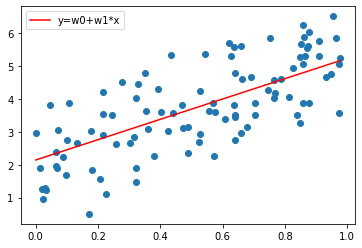

In [ ]:
# Générer des données d'entraînement aléatoires
X = np.random.rand(100, 2)
X[:,0] = 1
y = 2 + 3*X[:,1] + np.random.randn(100)

# Paramètres de l'algorithme de descente de gradient
t = 0.01
N_max = 1000

# Entraîner le régresseur
W,loss = train_regresseur(X,y,t,N_max)

# Tracer les exemples d'apprentissage
plt.scatter(X[:,1],y)

# Tracer la droite de régression
x = np.linspace(X[:,1].min(), X[:,1].max(), 100)
y = W[0] + W[1]*x

plt.plot(x, y, '-r', label='y=w0+w1*x')
plt.legend(loc='best')
plt.show()

